# Solution 3

## Tamir Cohen

### Q1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

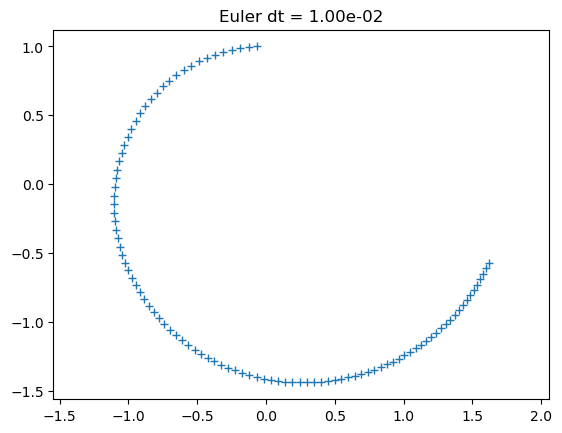

In [155]:
def FO_Euler_func (x,y,vx,vy,dt):
    global GM
    dvx =  -GM/((x**2 + y**2)**(3/2)) * x * dt
    dvy =  -GM/((x**2 + y**2)**(3/2)) * y * dt

    dx =  vx * dt
    dy =  vy * dt
    return dx, dy, dvx, dvy
    


def main():
    global GM
    GM = 4*np.pi**2;

    a = 1
    e = 0
    
    x0 = 0; y0 = a*(1-e);
    vx0 =-np.sqrt( GM/a * (1+e)/(1-e) ) ; vy0 = 0

    x=x0; y=y0; vx=vx0; vy=vy0;
    
    T = 1 # single orbit
    dt = 1e-2
    t = 0
    X = np.array([]); Y=X; VX=Y; VY=VX;
    count = 0
    
    while t<=T:
        # count +=1
        # print (count)
        dx, dy, dvx, dvy = FO_Euler_func (x,y,vx,vy,dt)
        x+=dx; y+=dy; vx+=dvx; vy+=dvy;
        
        X = np.append(X,x); Y = np.append(Y,y); 
        VX = np.append(VX,vx); VY = np.append(VY,vy); 
        
        t+=dt
        # plt.plot(x,y,'o')        # print(y)
    # plt.show()        
    # print(X)
    # print(Y)
    
    plt.plot(X,Y,'+')
    plt.title (f'Euler dt = {dt:.2e}' )
    plt.axis('equal')
    plt.show()


if True:
    main()
    
    
        
    
    
    
    
    








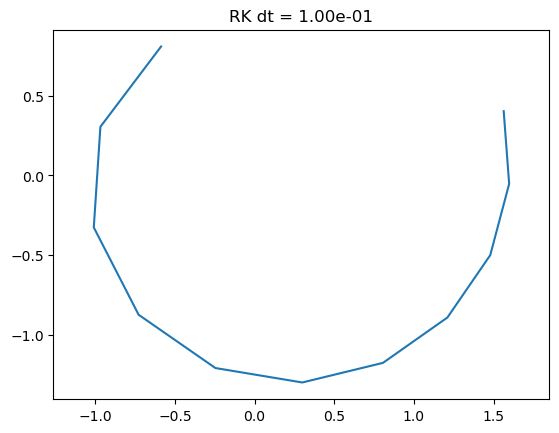

In [162]:
def Forth_Order_RK (x,y,vx,vy,dt):
    global GM

    ## K1 
    k1vx = -GM/((x**2 + y**2)**(3/2)) * x * dt
    k1vy = -GM/((x**2 + y**2)**(3/2)) * y * dt
    k1x =  vx * dt
    k1y =  vy * dt
    
    ## K2
    k2vx = -GM/(( (x+k1x/2)**2 + (y+k1y/2)**2) **(3/2)) * (x+k1x/2) * dt
    k2vy = -GM/(( (x+k1x/2)**2 + (y+k1y/2)**2) **(3/2)) * (y+k1y/2) * dt
    k2x =  (vx+k1vx/2) * dt
    k2y =  (vy+k1vy/2) * dt
    ## K3
    k3vx = -GM/(( (x+k2x/2)**2 + (y+k2y/2)**2) **(3/2)) * (x+k2x/2) * dt
    k3vy = -GM/(( (x+k2x/2)**2 + (y+k2y/2)**2) **(3/2)) * (y+k2y/2) * dt
    k3x =  (vx+k2vx/2) * dt
    k3y =  (vy+k2vy/2) * dt

    ## K4
    k4vx = -GM/(( (x+k3x)**2 + (y+k3y)**2) **(3/2)) * (x+k3x/2) * dt
    k4vy = -GM/(( (x+k3x)**2 + (y+k3y)**2) **(3/2)) * (y+k3y/2) * dt
    k4x =  (vx+k3vx) * dt
    k4y =  (vy+k3vy) * dt

    ## calculate the deviations
    dvx = 1/6 * (k1vx + 2*k2vx + 2*k3vx + k4vx)
    dvy = 1/6 * (k1vy + 2*k2vy + 2*k3vy + k4vy)
    dx  = 1/6 * (k1x + 2*k2x + 2*k3x + k4x)
    dy  = 1/6 * (k1y + 2*k2y + 2*k3y + k4y)

    return dx, dy, dvx, dvy
    


def main():
    global GM
    GM = 4*np.pi**2;

    a = 1
    e = 0
    
    x0 = 0; y0 = a*(1-e);
    vx0 =-np.sqrt( GM/a * (1+e)/(1-e) ) ; vy0 = 0

    x=x0; y=y0; vx=vx0; vy=vy0;
    
    T = 1 # single orbit
    dt = 1e-1
    t = 0
    X = np.array([]); Y=X; VX=Y; VY=VX;
    count = 0
    
    while t<=T:
        # count +=1
        # print (count)
        dx, dy, dvx, dvy = Forth_Order_RK (x,y,vx,vy,dt)
        x+=dx; y+=dy; vx+=dvx; vy+=dvy;
        
        X = np.append(X,x); Y = np.append(Y,y); 
        VX = np.append(VX,vx); VY = np.append(VY,vy); 
        
        t+=dt
        # plt.plot(x,y,'o')        # print(y)
    # plt.show()        
    # print(X)
    # print(Y)
        # print(dx)
    plt.plot(X,Y)
    plt.title (f'RK dt = {dt:.2e}' )
    plt.axis('equal')
    plt.show()
    


if True:
    main()